In [1]:
import pandas as pd
import numpy as np
# import cv2
import os
from matplotlib import pyplot as plt

In [10]:
train_data_csv = pd.read_csv("/home/data_shares/purrlab/CheXpert/CheXpert-v1.0-small/train.csv", index_col = False)
for i in train_data_csv.columns:
    print(i)

Path
Sex
Age
Frontal/Lateral
AP/PA
No Finding
Enlarged Cardiomediastinum
Cardiomegaly
Lung Opacity
Lung Lesion
Edema
Consolidation
Pneumonia
Atelectasis
Pneumothorax
Pleural Effusion
Pleural Other
Fracture
Support Devices


In [11]:
train_data_csv

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


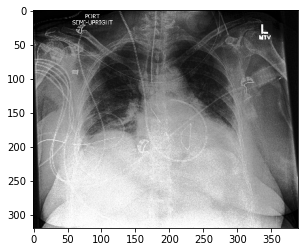

In [12]:

img = imread(img_path)img_id = "patient00123/study1/view1_frontal.jpg"
img_dir = "CheXpert-v1.0-small/train/"
img_path = "/home/data_shares/purrlab/CheXpert/" + img_dir + '/' + img_id
plt.imshow(img, cmap='gray')
plt.show()

In [14]:
from PIL import Image
import numpy as np

def compute_histogram(image_path):
    # Open the image with Pillow
    try:
        image = Image.open(image_path).convert('L')  # Convert image to grayscale
    except IOError:
        return np.zeros((256,))  # Return a zero-filled array if the image can't be opened

    # Convert image to a numpy array
    image_array = np.array(image)
    
    # Calculate histogram using numpy
    histogram, _ = np.histogram(image_array, bins=256, range=(0, 256))
    
    # Normalize the histogram
    histogram = histogram / histogram.sum()
    
    return histogram

In [20]:
def process_images_and_update_df(df):
    # Path prefix to reach the image directory
    base_path = "/home/data_shares/purrlab/CheXpert/"
    
    # Initialize a list to store histogram features
    histograms = []
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Full path to the image
        image_path = os.path.join(base_path, row['Path'])
        
        # Compute the histogram
        hist = compute_histogram(image_path)
        
        # Append the histogram to the list
        histograms.append(hist)
    
    # Convert list of histograms to a DataFrame
    hist_df = pd.DataFrame(histograms, columns=[f'hist_bin_{i}' for i in range(256)])
    
    # Concatenate the original DataFrame with the new histogram features
    updated_df = pd.concat([df, hist_df], axis=1)
    
    return updated_df


In [21]:
updated_train_data = process_images_and_update_df(train_data_csv)


In [22]:
updated_train_data

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,hist_bin_246,hist_bin_247,hist_bin_248,hist_bin_249,hist_bin_250,hist_bin_251,hist_bin_252,hist_bin_253,hist_bin_254,hist_bin_255
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,0.004282,0.003848,0.003840,0.004314,0.003824,0.003061,0.002739,0.002185,0.001494,0.001952
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,0.003894,0.003806,0.004263,0.003902,0.003998,0.003950,0.003421,0.003790,0.003221,0.002724
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,0.003566,0.002925,0.003782,0.004159,0.004255,0.004567,0.005577,0.004327,0.003622,0.001939
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,0.004135,0.003870,0.003926,0.003878,0.003974,0.003854,0.003838,0.003926,0.003830,0.002075
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,0.004447,0.004135,0.004287,0.003814,0.004006,0.003894,0.004311,0.006715,0.003598,0.001418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,0.004499,0.004065,0.004041,0.003784,0.003607,0.003744,0.003952,0.004692,0.003462,0.001791
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,0.004892,0.005583,0.004836,0.005535,0.005165,0.005278,0.005117,0.004651,0.003687,0.002796
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,0.004221,0.004003,0.003902,0.004128,0.003817,0.003685,0.003871,0.003420,0.002775,0.002627
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,...,0.004431,0.004244,0.003996,0.004050,0.004299,0.003638,0.003350,0.003296,0.002387,0.003358


In [26]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist

def preprocess_and_extract_features(df, base_image_path):
    # Initialize a list to store the corner features
    corner_features = []

    # Iterate over each image path in the DataFrame
    for index, row in df.iterrows():
        # Construct the full image path
        image_path = os.path.join(base_image_path, row['Path'])
        
        try:
            # Open the image with Pillow and convert to grayscale
            image_pil = Image.open(image_path).convert('L')
            image = np.array(image_pil)  # Convert to numpy array for processing
            
            # Apply histogram equalization
            image = equalize_hist(image)
            
            # Convert image to grayscale if not already
            image = rgb2gray(image) if image.ndim == 3 else image
            
            # Detect corners using the Harris corner detector from skimage
            detected_corners = corner_harris(image)
            coords = corner_peaks(detected_corners, min_distance=5)
            
            # Flatten the corner positions to create a feature vector
            feature_vector = coords.flatten()
            
            # If we have less than the expected number of features, pad with zeros
            if len(feature_vector) < 200:
                feature_vector = np.pad(feature_vector, (0, 200 - len(feature_vector)), mode='constant')
                
            corner_features.append(feature_vector[:200])  # Ensure all feature vectors are the same length
        except IOError:
            # Append an empty feature set if the image is not available
            corner_features.append(np.zeros(200))  # Example: 200 features, could be adjusted

    # Create a DataFrame from the corner features
    features_df = pd.DataFrame(corner_features, columns=[f'corner_{i}' for i in range(200)])
    
    # Concatenate with the original DataFrame
    updated_df = pd.concat([df.reset_index(drop=True), features_df], axis=1)
    
    return updated_df

In [27]:
base_image_path = "/home/data_shares/purrlab/CheXpert/"
updated_train_data = preprocess_and_extract_features(updated_train_data, base_image_path)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.


In [28]:
updated_train_data.to_csv('updated_train_data.csv', index=False)